

```
  Naveen,Kailash -> PreProcessing
  Mahesh, Ajay   -> Visualisation
  
```
Dataset        -> https://www.kaggle.com/mlg-ulb/creditcardfraud



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
driveURL = 'https://drive.google.com/file/d/1P4DpRVjFO0V9PtlPyeq9WQNzPzCQpWNG/view?usp=sharing'
PATH = 'https://drive.google.com/uc?id=' + driveURL.split('/')[-2]
df = pd.read_csv(PATH)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 19229 & 19232

Knowing The Dataframe

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277837576,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638671953,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,NaN,NaN,NaN,NaN,NaN
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679402,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,NaN,NaN,NaN,NaN,NaN
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005273597,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,NaN,NaN,NaN,NaN,NaN
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278495,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(284807, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         284807 non-null  float64
 1   V1           284807 non-null  float64
 2   V2           284807 non-null  float64
 3   V3           284807 non-null  float64
 4   V4           284807 non-null  float64
 5   V5           284807 non-null  float64
 6   V6           284807 non-null  float64
 7   V7           284807 non-null  float64
 8   V8           284807 non-null  float64
 9   V9           284807 non-null  float64
 10  V10          284807 non-null  float64
 11  V11          284807 non-null  float64
 12  V12          284807 non-null  float64
 13  V13          284807 non-null  float64
 14  V14          284807 non-null  float64
 15  V15          284807 non-null  float64
 16  V16          284807 non-null  float64
 17  V17          284807 non-null  float64
 18  V18          284807 non-

In [ ]:
df.isnull().sum()

Time                0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 1
V23                 1
V24                 1
V25                 1
V26                 1
V27                 1
V28                 1
Amount              1
Class               1
Unnamed: 31    284806
Unnamed: 32    284806
Unnamed: 33    284806
Unnamed: 34    284806
Unnamed: 35    284806
dtype: int64

In [ ]:
df[['Amount', 'Class']].describe()

,Amount,Class
count,284806.000000,284806.000000
mean,88.349014,0.001724
std,250.120435,0.041569
min,0.000000,-0.993479
25%,5.592500,0.000000
50%,22.000000,0.000000
75%,77.160000,0.000000
max,25691.160000,1.000000


Cleaning The Dataframe

In [ ]:
data = df[['Amount', 'Class']]
df2 = data.fillna(0.0)
df2.isnull().sum()

Amount    0
Class     0
dtype: int64

In [ ]:
df = df.dropna(axis=1)
df = df.join(df2)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.drop(df[df['Class'] < 0].index, inplace=True)
df.Class.value_counts()

0.0    284314
1.0       492
Name: Class, dtype: int64

Getting Insights From The Dataframe

In [ ]:
df.loc[df['Amount'] > 150, ['Time', 'Class']].head(20)

,Time,Class
2,1.0,0.0
20,16.0,0.0
51,36.0,0.0
60,41.0,0.0
64,42.0,0.0
85,55.0,0.0
89,59.0,0.0
103,69.0,0.0
134,83.0,0.0
140,87.0,0.0


In [ ]:
df.loc[df['Class'] == 1.0, ['Class', 'Amount']]

,Class,Amount
541,1.0,0.00
623,1.0,529.00
2933,1.0,239.93
6108,1.0,59.00
6329,1.0,1.00
...,...,...
279863,1.0,390.00
280143,1.0,0.76
280149,1.0,77.89
281144,1.0,245.00


In [ ]:
fraudAmount = df.loc[df['Class'] == 1.0, 'Amount'].sum()
print('The Fraud Amount is ' + str(fraudAmount))

The Fraud Amount is 60127.97


In [ ]:
fraudMaxAmount = df.loc[df['Class'] == 1.0, 'Amount'].max()
print('The Maximum Fraud Amount is ' + str(fraudMaxAmount))

The Maximum Fraud Amount is 2125.87


In [ ]:
fraudMinAmount = df.loc[df['Class'] == 1.0, 'Amount'].min()
print('The Minimum Fraud Amount is ' + str(fraudMinAmount))

The Minimum Fraud Amount is 0.0


In [ ]:
pd.crosstab(df.Class, df.Amount)

Amount,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,5680.00,5707.82,5714.20,5714.58,5918.00,5934.90,5964.95,6000.00,6130.21,6239.54,6454.74,6511.00,6652.89,6669.00,6828.00,6900.47,6950.51,6982.67,6998.00,7367.00,7429.15,7541.70,7583.32,7636.30,7712.43,7766.60,7862.39,7879.42,8182.70,8360.00,8787.00,8790.26,10000.00,10199.44,11789.84,11898.09,12910.93,18910.00,19656.53,25691.16
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1799,713,85,3,11,44,3,11,10,2,34,23,234,5,5,19,2,7,1,4,6,36,51,10,5,3,7,13,1,13,16,7,6,1,3,5,10,12,10,4,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,27,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(df.Class, df.Amount, margins=True).transpose()

Class,0.0,1.0,All
Amount,,,
0.0,1799,27,1826
0.01,713,5,718
0.02,85,0,85
0.03,3,0,3
0.04,11,0,11
...,...,...,...
12910.93,1,0,1
18910.0,1,0,1
19656.53,1,0,1


It has been shown that, the fraud amount is less than 2200.0 for all transactions given in the dataset. 

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,
0.0,94838.523080,0.008260,-0.006275,0.012166,-0.007862,0.005452,0.002419,0.009634,-0.000986,0.004461,0.009824,-0.006576,0.010839,0.000180,0.012059,0.000159,0.007166,0.011530,0.003893,-0.001185,-0.000544,-0.001232,88.290414
1.0,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,122.211321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



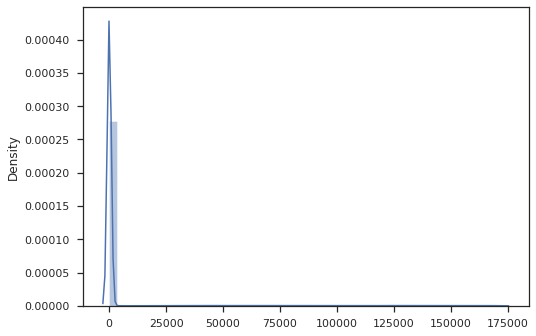

In [ ]:
sns.distplot(df)

Using SMOTE for Unbalance dataset

In [ ]:
df.shape

(284806, 24)

In [ ]:
X1 = df.drop(columns='Class', axis=1)
y1 = df['Class']
X1.shape, y1.shape

((284806, 23), (284806,))

0 Normal Transaction
1 Fraud Transaction

In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284314, 24)
(492, 24)


Statistical Measure of the data

In [ ]:
legit.Amount.describe()

count    284314.000000
mean         88.290414
std         250.105419
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# 19209

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


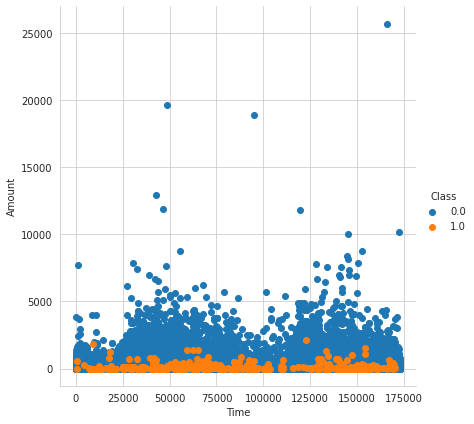

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud

In [ ]:
#3d plotting
FilteredData = df[['Time','Amount', 'Class']]
FilteredData.head()

,Time,Amount,Class
0,0.0,149.62,0.0
1,0.0,2.69,0.0
2,1.0,378.66,0.0
3,1.0,123.50,0.0
4,2.0,69.99,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


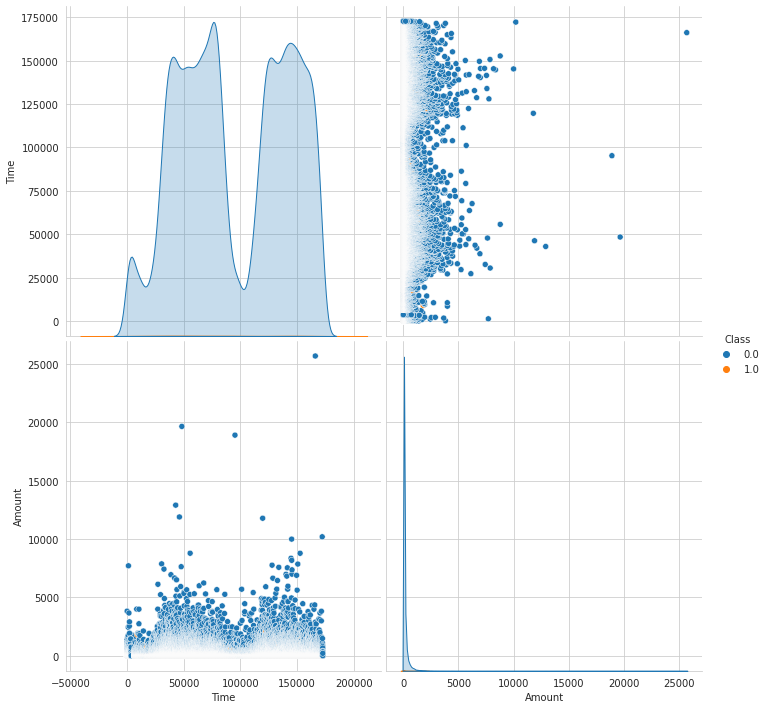

In [ ]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show();

In [ ]:
 class0 = 0
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

283865
492


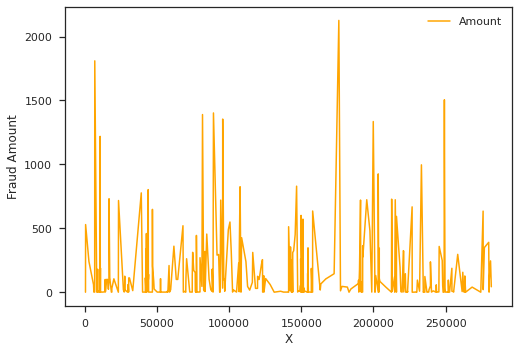

In [ ]:
fraudAmt = df.loc[df['Class'] == 1.0, ['Amount']]
plt.xlabel('X')
plt.ylabel('Fraud Amount')
plt.plot(fraudAmt, color="orange")
plt.legend(['Amount'])
plt.show()

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.

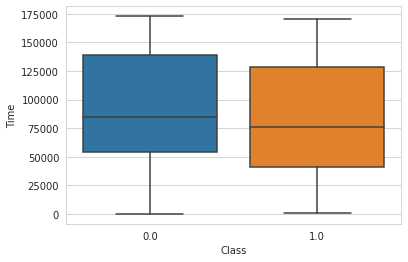

In [ ]:
sns.boxplot(x = "Class", y = "Time", data = df)
plt.show()

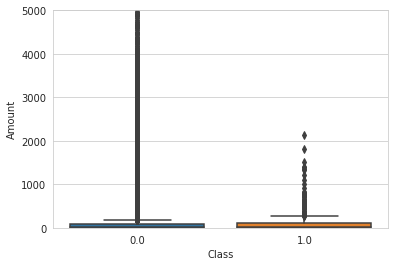

In [ ]:
sns.boxplot(x = "Class", y = "Amount", data =df)
plt.ylim(0, 5000)
plt.show()

 This shows that there is no transaction fraud above 2500 all the frauds are below 2500

# EDA - 19209 

Exploratory Data Analysis, is the act of analyzing a dataset to understand the main statistical characteristics with visual and statistical methods.

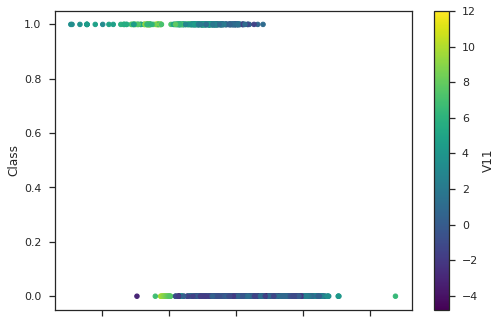

In [ ]:
df.plot.scatter(x='V10',y='Class',c='V11',colormap='viridis')

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(dataset['V3'],ax=axes[0])
sns.distplot(dataset['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

Scatter plots are useful to show individual values plot on a two dimensional cartesian X & Y plane from two Series in a Pandas DataFrame.

Pair plots can play a similar role to individual scatter plots as they provide a variety of visualizations

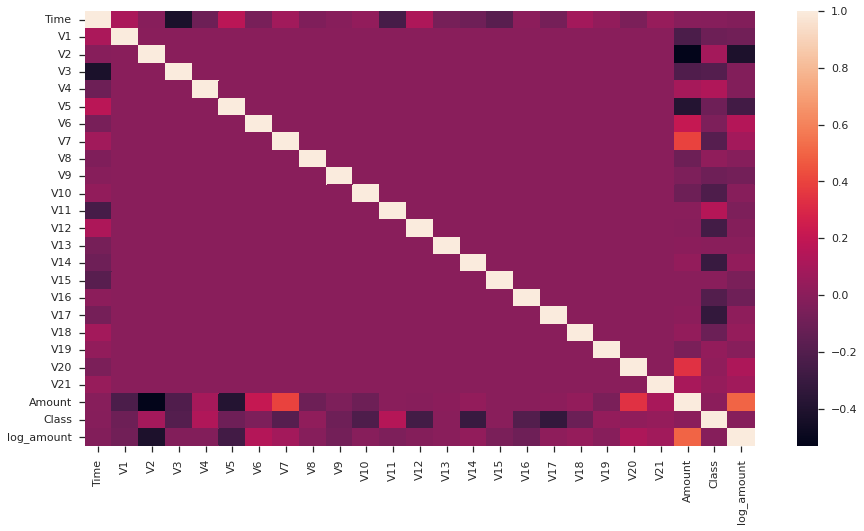

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 19224

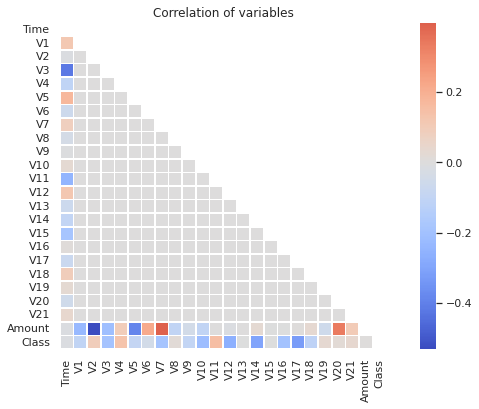

In [ ]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib # helping the plotting
import matplotlib.pyplot as plt  
import missingno as mno # plot missing numbers
import seaborn as sns 
sns.set_style('darkgrid')
import plotly.express as px
import matplotlib.colors as cl

plt.figure(figsize = (12,6))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(style = 'whitegrid')
sns.heatmap(corr, mask=mask, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=.6)
plt.title("Correlation of variables")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

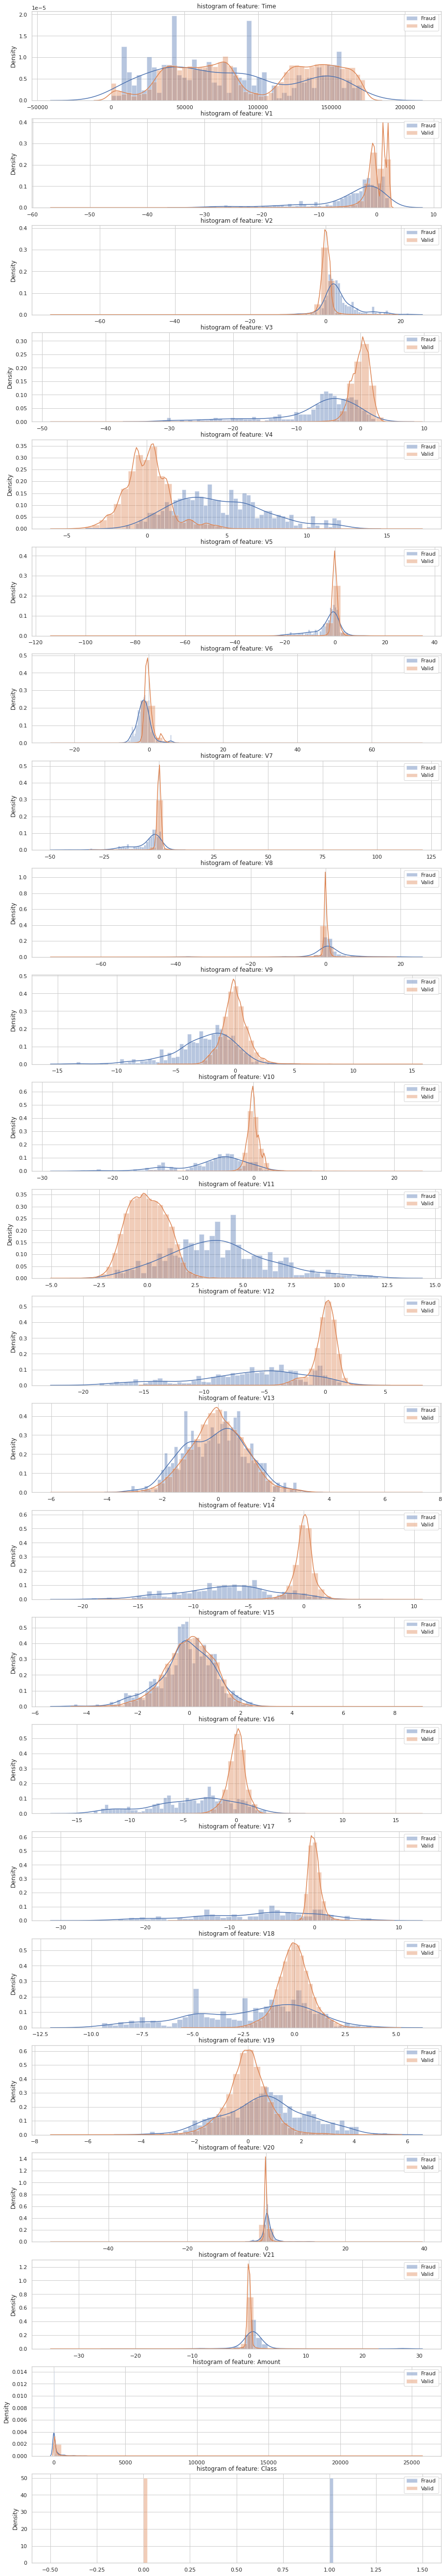

In [ ]:
features = df.iloc[:,0:29].columns
plt.figure(figsize=(15,29*4))
gs = gridspec.GridSpec(29, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50,label='Fraud')
    sns.distplot(df[c][df.Class == 0], bins=50,label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

differences between the densities of Fraud and Valid classes. Valid cases are usually concentrated together and hence have sharp density plots whereas Fraud transactions are more spread out.

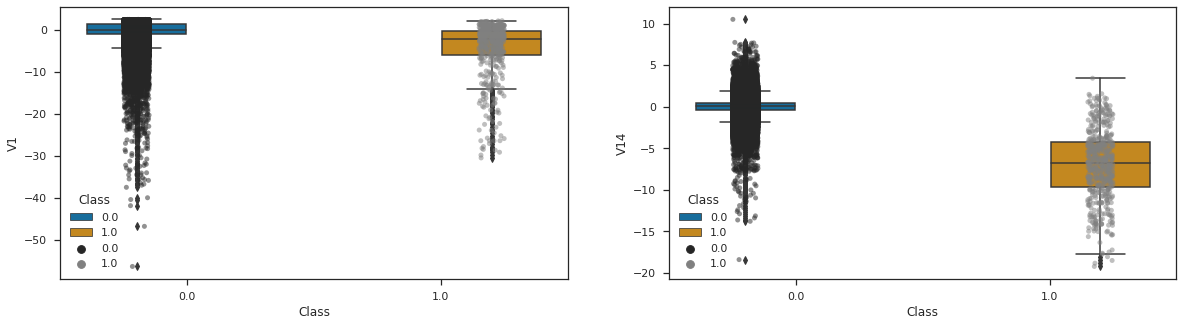

In [72]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=df, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

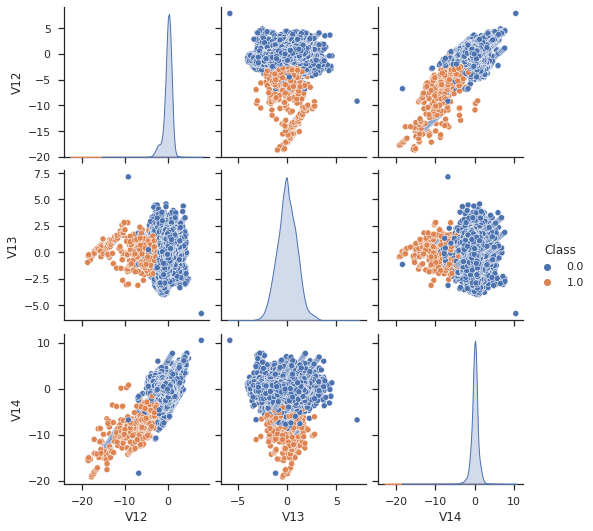

In [73]:
sns.set(style="ticks")
sns.pairplot(df[["V12","V13","V14","Class"]], hue="Class")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



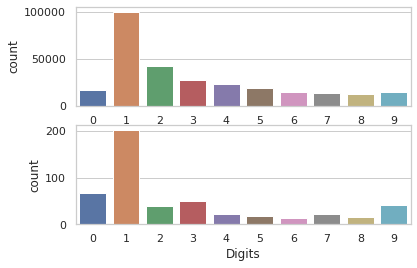

In [ ]:
dft = df[["Amount","Class"]].copy()
dft['Digits'] = dft.Amount.astype(str).str[:1].astype(int)

plt.subplot(211)
sns.countplot(dft[dft.Class == 0].Digits)

plt.subplot(212)
sns.countplot(dft[dft.Class == 1].Digits)

Benford’s Law, also known as the Law of First Digits or the Phenomenon of Significant Digits, is the finding that the first digits (or numerals to be exact) of the numbers found in series of records of the most varied sources do not display a uniform distribution, but rather are arranged in such a way that the digit “1” is the most frequent, followed by “2”, “3”, and so in a successively decreasing manner down to “9”.

We can see that the fraudulent transactions fail to follow this law, hence we can infer that something is wrong with those transactions.

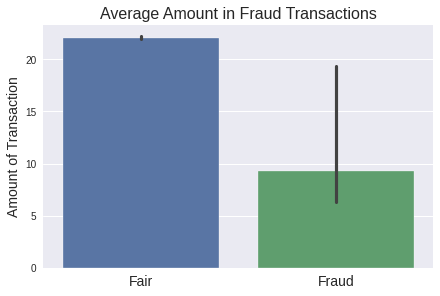

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1 ,1, figsize = (6, 4), constrained_layout = True)
ax = sns.barplot(x = 'Class', y = 'Amount', data = df, estimator = np.median, ax = ax)

plt.title("Average Amount in Fraud Transactions", size = 16)

ax.set_xticklabels(['Fair', 'Fraud'], fontsize = 14)

plt.xlabel(None)
plt.ylabel('Amount of Transaction', fontsize = 14);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



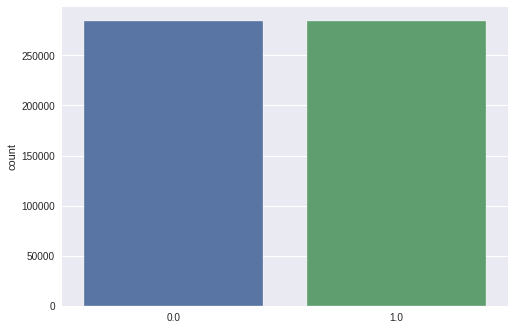

In [ ]:
from imblearn.over_sampling import SMOTE
X=df.drop('Class', axis=1)
y=df['Class']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)

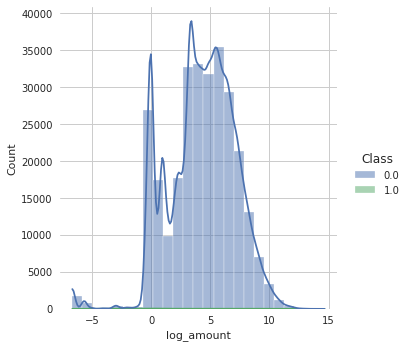

In [ ]:
sns.set_style("whitegrid")
df["log_amount"] = np.log2(df["Amount"]+0.01)
sns.displot(x = "log_amount",bins = 25, kde = True, hue = "Class", data=df)

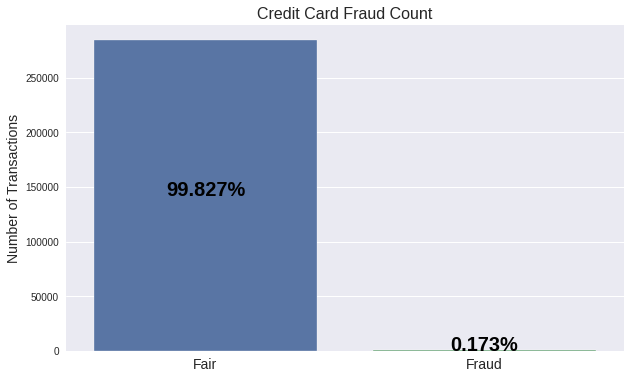

In [ ]:
# Checking for class imbalance 
plt.style.use('seaborn')
fig = plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'Class', data = df)

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2, 
            s = f"{np.round(i.get_height()/len(df)*100, 3)}%", 
            ha = 'center', size = 20, weight = 'bold', rotation = 0, color = 'black')

plt.title("Credit Card Fraud Count", size = 16)

ax.set_xticklabels(['Fair', 'Fraud'], fontsize = 14)

plt.xlabel(None)
plt.ylabel('Number of Transactions', fontsize = 14);

Only 0.173% tractions are fraud, which is very much less than other class. If we train our model on this unbalanced class data, then the model won't learn much from Fraud class and will try to give more importance to Fair class, which we don't want. Let's see that in action, I will train a simple logistic regression model and see its performance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



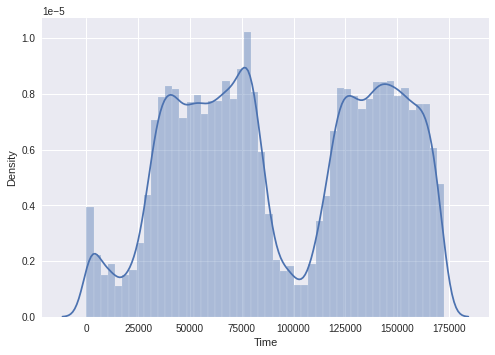

In [ ]:
sns.distplot(df['Time'])
plt.show()

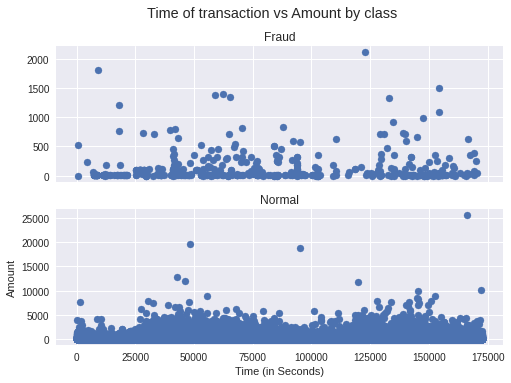

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



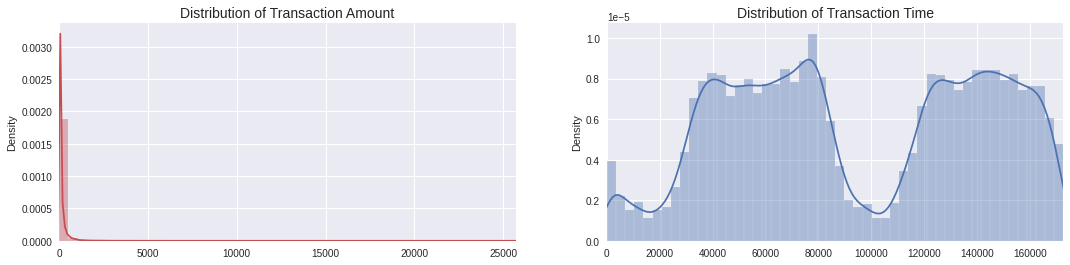

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)]);

Text(0.5, 1.0, 'BoxPlot for Amount')

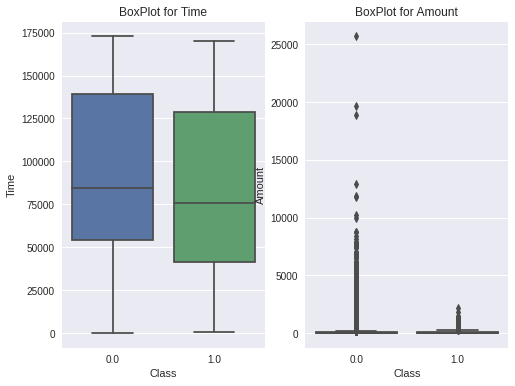

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(8,6))
sns.boxplot(x = df['Class'],y = df["Time"],ax=axes[0])
axes[0].set_title("BoxPlot for Time")
sns.boxplot(x = df['Class'],y = df.Amount,ax=axes[1])
axes[1].set_title("BoxPlot for Amount")

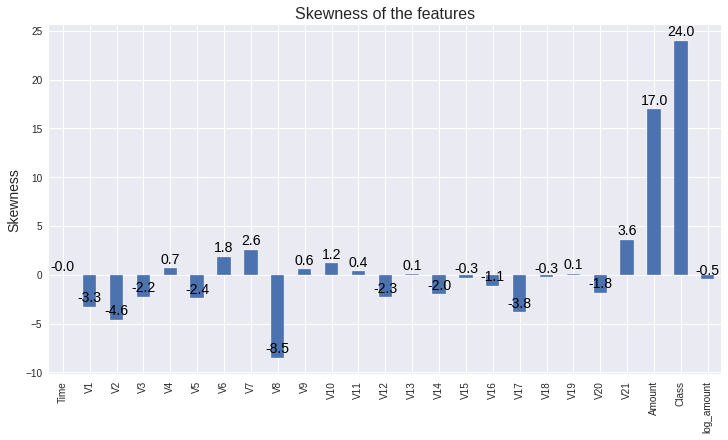

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = df.skew(axis = 0).plot(kind = 'bar')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.5, 
            s = f"{np.round(i.get_height(), 1)}", 
            ha = 'center', size = 14, rotation = 0, color = 'black')
    
ax.set_ylabel('Skewness', fontsize = 14)
ax.set_title('Skewness of the features', fontsize = 16);

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class.